# Final Insights for the app

## Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import sys
import os

# Configuration
sys.path.append(os.path.abspath('..'))
from src.config import PATHS

# Professional Plot Styling
sns.set_theme(style="whitegrid", context="talk")
colors = {'POSITIVE': '#2ecc71', 'NEUTRAL': '#95a5a6', 'NEGATIVE': '#e74c3c'}

## Load data

In [2]:
df = pd.read_csv(f"../{PATHS['final_data']}")
df['date'] = pd.to_datetime(df['date'])
print(f"Loaded {len(df)} reviews.")

Loaded 1266 reviews.


## Comparative Sentiment Distribution

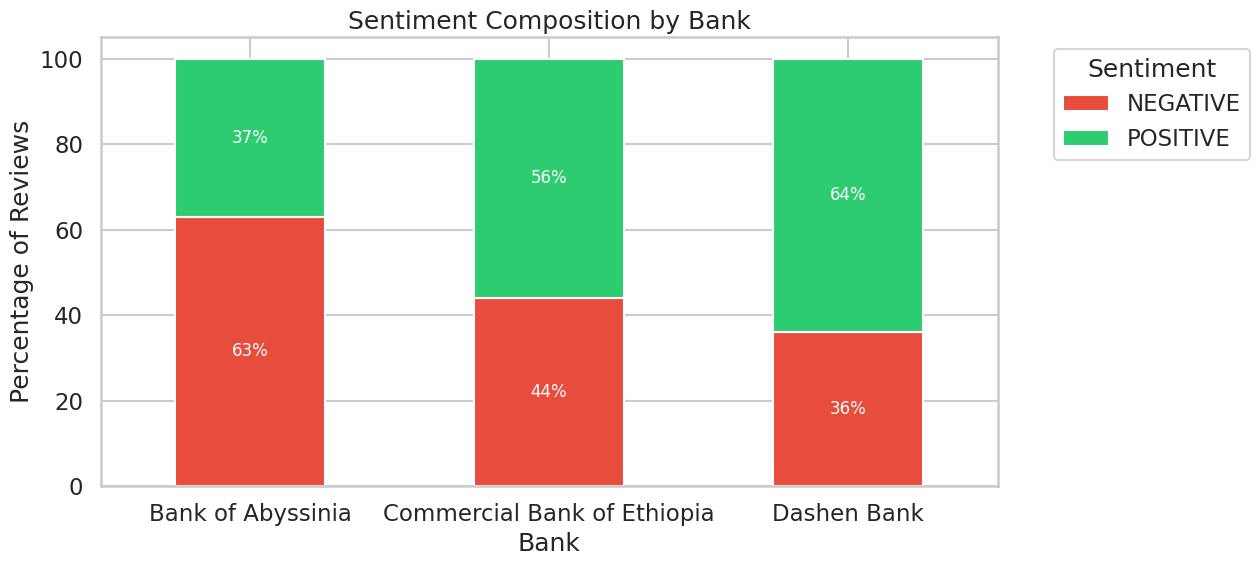

In [6]:
# Create a 100% Stacked Bar Chart
sentiment_counts = df.groupby(['bank', 'sentiment_label']).size().unstack(fill_value=0)
sentiment_pcts = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

ax = sentiment_pcts.plot(kind='bar', stacked=True, color=[colors[x] for x in sentiment_pcts.columns], figsize=(13, 6))

plt.title('Sentiment Composition by Bank')
plt.xlabel('Bank')
plt.ylabel('Percentage of Reviews')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# Add labels
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f%%', label_type='center', color='white', fontsize=12)

plt.tight_layout()
plt.show()

## Pain Point Heatmap

Identifies which specific themes are causing negative reviews.

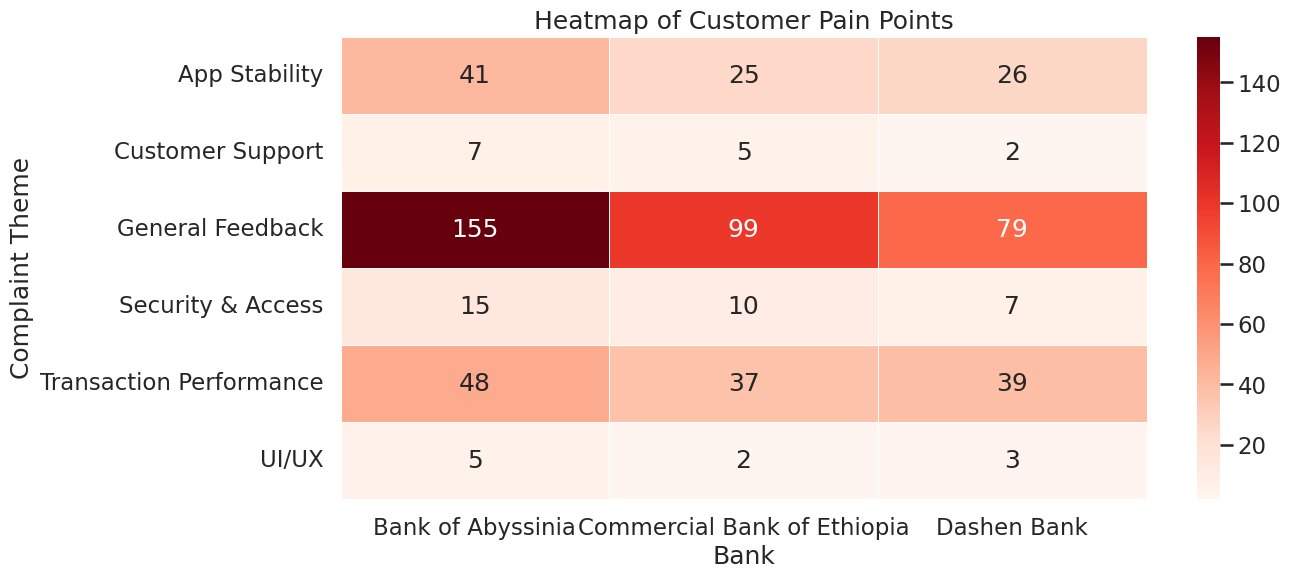

In [7]:
# Filter Negative Reviews
neg_df = df[df['sentiment_label'] == 'NEGATIVE']

# Cross-tabulate Bank vs Theme
heatmap_data = pd.crosstab(neg_df['theme'], neg_df['bank'])

plt.figure(figsize=(13, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Reds', linewidths=.5)
plt.title('Heatmap of Customer Pain Points')
plt.ylabel('Complaint Theme')
plt.xlabel('Bank')
plt.show()

## Sentiment Trend over time

/tmp/ipykernel_189825/2913686336.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_trend = df.set_index('date').groupby([pd.Grouper(freq='M'), 'bank'])['sentiment_score'].mean().reset_index()


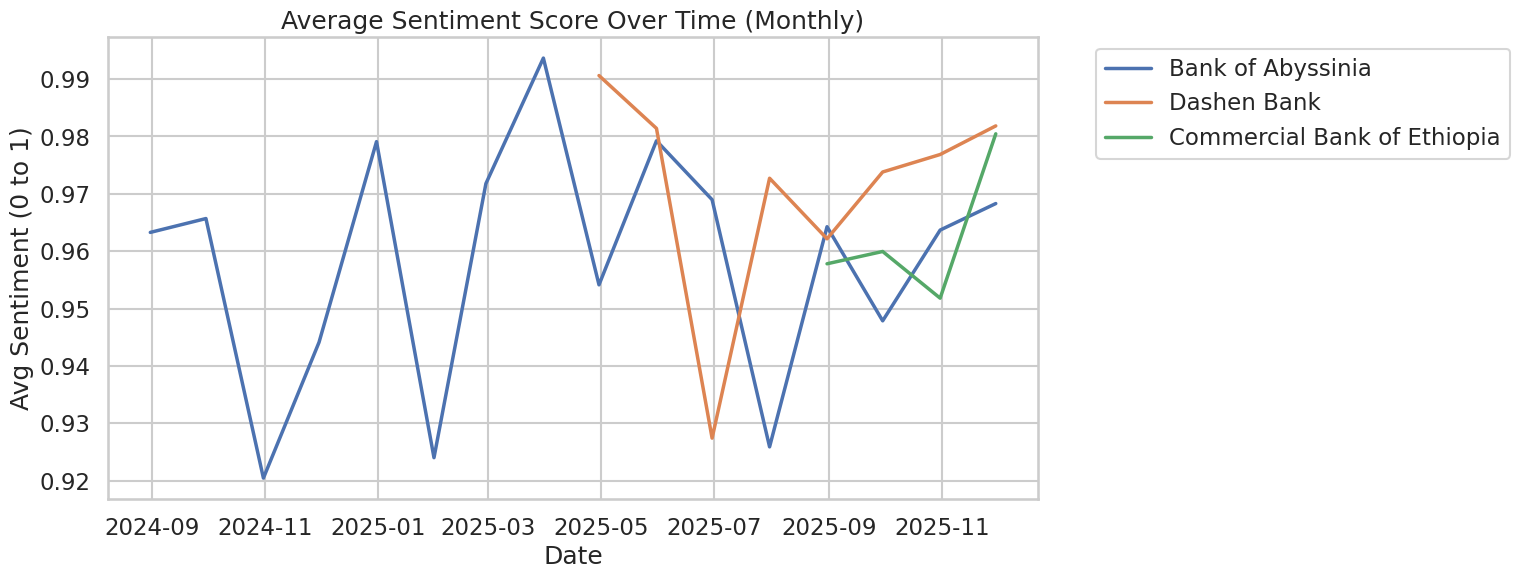

In [8]:
# Resample by Month
df_trend = df.set_index('date').groupby([pd.Grouper(freq='M'), 'bank'])['sentiment_score'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_trend, x='date', y='sentiment_score', hue='bank', linewidth=2.5)
plt.title('Average Sentiment Score Over Time (Monthly)')
plt.ylabel('Avg Sentiment (0 to 1)')
plt.xlabel('Date')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Keyword Clouds

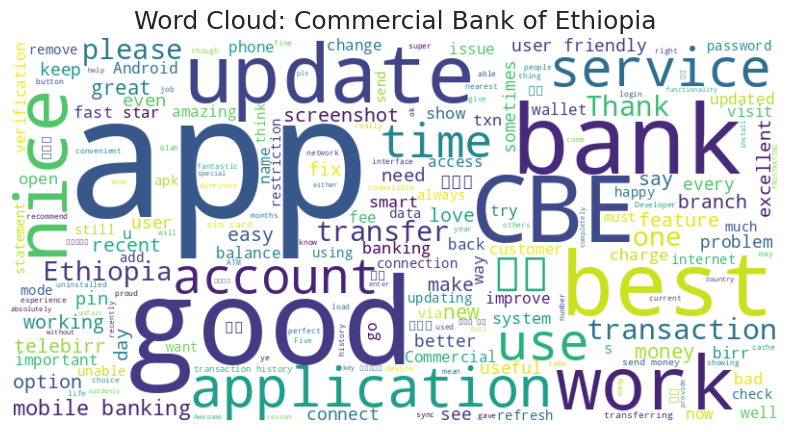

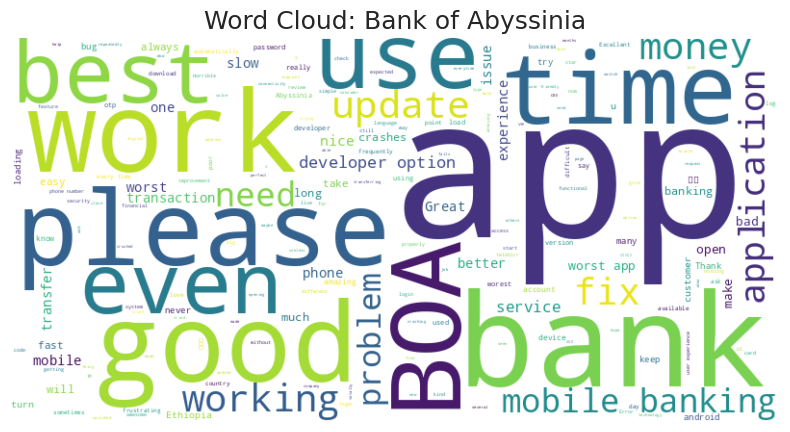

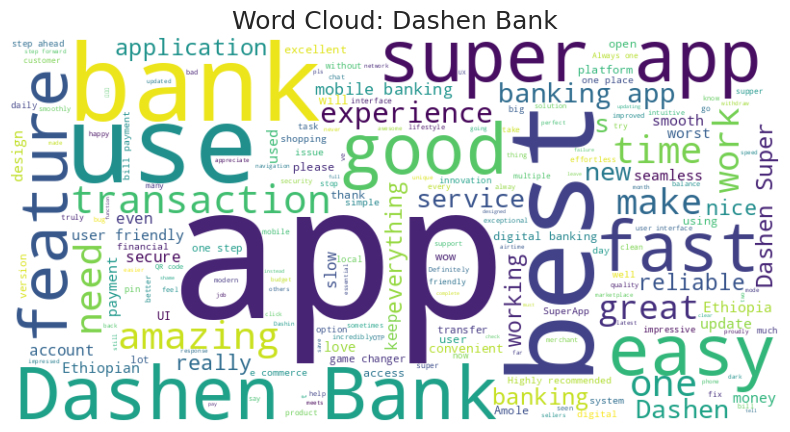

In [9]:
def generate_wordcloud(bank_name):
    text = " ".join(review for review in df[df['bank'] == bank_name]['review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud: {bank_name}')
    plt.show()

# Generate for all banks
for bank in df['bank'].unique():
    generate_wordcloud(bank)

## Ethical Bias Analysis

### Ethical Considerations & Bias Note
* **Selection Bias:** Reviews are predominantly written by users with strong emotions (very happy or very angry). Neutral experiences are underrepresented.
* **Recency Bias:** Scraper was sorted by "Newest", reflecting current app versions but potentially missing historical context.
* **Language Bias:** Analysis was limited to English; Amharic reviews (written in Latin script) may have been misclassified by the English-trained model.